In [1]:
import numpy as np
import matplotlib.pyplot as plt
from flowsim import *
import seaborn as sns
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [30]:
from  flowsim import *

In [31]:
with open("../../experiments/cached_arrival_processes/58_4.0.deltas", 'r') as f:
    deltas = np.array([float(l.strip()) for l in f]).flatten()

In [43]:
clock = Clock()

inception_array = np.array([
       [1,  68.10305,  26.3],
       [2,  72.8235,   45.8],
       [4,  73.88426,  81.5],
       [8,  105.866700, 132.8],
       [12, 112.031640, 179.5],
       [16, 149.952640, 199.5],
       [24, 195.421250, 213.0]])
inception_array=inception_array[np.argsort(inception_array[:,0])]

def line_segment_function(x,y):
    def result(x_point):
        if x_point in x:
            return y[x == x_point][0]
        less_index = max(np.arange(len(x))[x < x_point])
        more_index = min(np.arange(len(x))[x > x_point])
        rise = y[more_index] - y[less_index]
        run = x[more_index] - x[less_index]
        slope = float(rise)/run
        delta = x_point - x[less_index]
        return y[less_index] + delta*slope
    return result

over_latencies = 1/(inception_array[:,2]/1000)
batches = inception_array[:,0]

inception_fn = line_segment_function(batches, batches*over_latencies)

queries = [Query(timestamp) for timestamp in np.cumsum(deltas)]

a = SourceNode(clock, queries)
b = BatchedNode(clock, batch_fn = inception_fn, max_batch_size = 16)
a.then(b)

sink = SinkNode(clock)
b.then(sink)

In [44]:
clock.run()

In [45]:
queries[0]

q(200000:24.7530674812->62.7758811694)

In [48]:
response_times = np.asarray([[q.start_time, q.finish_time - q.start_time] for q in queries[:15000]])

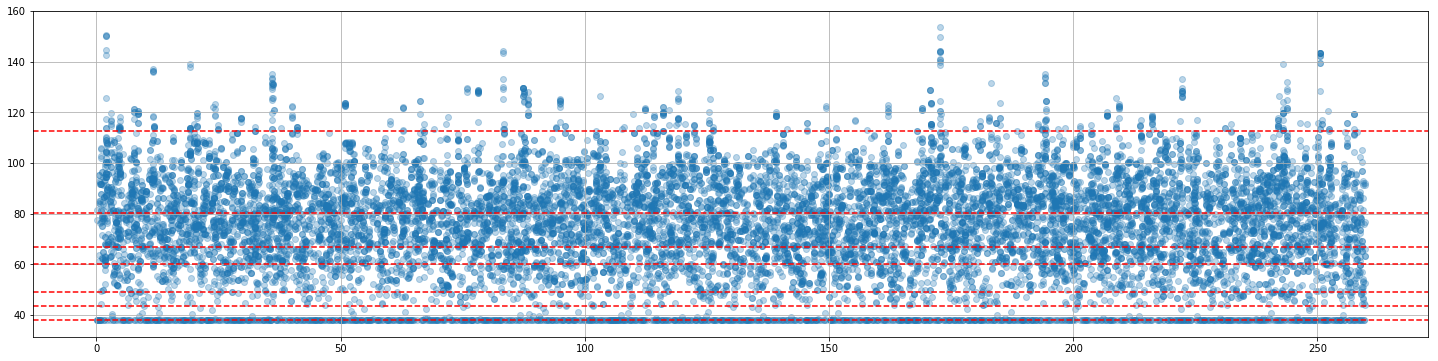

In [50]:
plt.figure(figsize=(25,6))
for l in batches*over_latencies:
    plt.axhline(y=l, linestyle="--", color="red")
plt.scatter(response_times[:,0]/1000., response_times[:,1],alpha=0.3)
plt.grid()

In [36]:
print("Throughput:", max(q.finish_time for q in queries) / len(queries))

('Throughput:', 17.35079966441008)


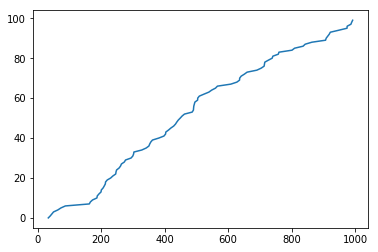

In [5]:
plt.plot(sorted(q.finish_time for q in queries), range(len(queries)))

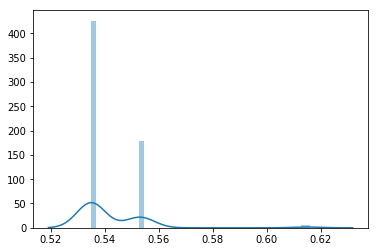

In [6]:
latency = np.array([q.finish_time - q.start_time for q in sink.finished])
sns.distplot(latency,bins=50)

In [8]:
a = Node(clock)

In [9]:
isinstance(a, Node)

True